# В папке лежат тексты двух пьес Шекспира очень знаменитых, но разных переводчиков. Что покажет A/B тестирование? 

In [1]:
from scipy.stats import norm, chi2_contingency
import statsmodels.api as sm
import numpy as np
from spacy.lang.ru import Russian
from collections import Counter
import re
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
import os
os.chdir("/Users/egorgusev/Анализ данных/Задание 7")

In [3]:
f = open('Уильям Шекспир.Гамлет.docx.txt', "r", encoding="utf-8")
hamlet = f.read()
hamlet

'\ufeffУильям Шекспир.\nГамлет, принц датский\nДействующие лица [*]\nКлавдий, король Датский.\nГамлет, сын покойного и племянник царствующего короля.\nФортинбрас, принц Норвежский.\nПолоний, ближний вельможа.\nГорацио, друг Гамлета.\nЛаэрт, сын Полония.\n\n\nВольтиманд, Корнелий, Розенкранц, Гильденстерн, Озрик, Первый дворянин, Второй дворянин – придворные.\n\n\nСвященник.\n\n\nМарцелл, Бернардо – офицеры.\n\n\nФрансиско, солдат.\nРейнальдо, слуга Полония.\nАктеры.\nДва могильщика.\nКапитан.\nАнглийские послы.\nГертруда, королева Датская, мать Гамлета.\nОфелия, дочь Полония.\nПризрак отца Гамлета.\n\n\nВельможи, дамы, офицеры, солдаты, моряки, гонцы и другие слуги.\n\n\nМесто действия – Эльсинор. [*]\nАкт I\nСцена 1\nЭльсинор. Площадка перед замком.\nФрансиско на страже. Входит Бернардо.\nЭльсинор. Площадка перед замком.\nФрансиско на страже. Входит Бернардо.\n\n\nБернардо\nКто здесь?\nФрансиско\nНет, сам ответь мне; стой и объявись.\nБернардо\nКороль да здравствует!\nФрансиско\nБерна

In [4]:
hamlet = hamlet.lower()

In [5]:
nlp = Russian()
doc = nlp(hamlet)
hamlet_words = [token.text.replace("\n","").replace(" ","").replace("|","") for token in doc if #token.is_stop != True and 
         token.is_punct != True]
hamlet_words = list(filter(None, hamlet_words))


In [6]:
hamlet_words

['\ufeffуильям',
 'шекспир',
 'гамлет',
 'принц',
 'датский',
 'действующие',
 'лица',
 'клавдий',
 'король',
 'датский',
 'гамлет',
 'сын',
 'покойного',
 'и',
 'племянник',
 'царствующего',
 'короля',
 'фортинбрас',
 'принц',
 'норвежский',
 'полоний',
 'ближний',
 'вельможа',
 'горацио',
 'друг',
 'гамлета',
 'лаэрт',
 'сын',
 'полония',
 'вольтиманд',
 'корнелий',
 'розенкранц',
 'гильденстерн',
 'озрик',
 'первый',
 'дворянин',
 'второй',
 'дворянин',
 'придворные',
 'священник',
 'марцелл',
 'бернардо',
 'офицеры',
 'франсиско',
 'солдат',
 'рейнальдо',
 'слуга',
 'полония',
 'актеры',
 'два',
 'могильщика',
 'капитан',
 'английские',
 'послы',
 'гертруда',
 'королева',
 'датская',
 'мать',
 'гамлета',
 'офелия',
 'дочь',
 'полония',
 'призрак',
 'отца',
 'гамлета',
 'вельможи',
 'дамы',
 'офицеры',
 'солдаты',
 'моряки',
 'гонцы',
 'и',
 'другие',
 'слуги',
 'место',
 'действия',
 'эльсинор',
 'акт',
 'i',
 'сцена',
 '1',
 'эльсинор',
 'площадка',
 'перед',
 'замком',
 'франсиск

In [7]:
len(hamlet_words)

25707

In [8]:
hamlet_words_freq = Counter(hamlet_words)
common_hamlet_words_top = hamlet_words_freq.most_common(30)
common_hamlet_words_top

[('и', 995),
 ('в', 571),
 ('не', 469),
 ('гамлет', 442),
 ('я', 435),
 ('что', 423),
 ('как', 293),
 ('он', 258),
 ('с', 237),
 ('это', 215),
 ('на', 198),
 ('так', 198),
 ('мой', 186),
 ('король', 179),
 ('вы', 168),
 ('его', 168),
 ('горацио', 162),
 ('но', 154),
 ('принц', 151),
 ('мне', 149),
 ('ты', 148),
 ('за', 141),
 ('бы', 140),
 ('то', 137),
 ('все', 132),
 ('а', 131),
 ('полоний', 128),
 ('к', 126),
 ('о', 123),
 ('королева', 120)]

In [9]:
dict_hamlet = dict(common_hamlet_words_top)

In [10]:
f = open('Уильям Шекспир. Макбет.docx.txt', "r", encoding="utf-8")
macbeth = f.read()
macbeth

'\ufeffУильям Шекспир. Макбет \n\n\n\n\n________________\n\n\n\n\n \n________________\n\n\n\n\n\n\n\n\n                            Перевод Б.Пастернака\n\n\n                              Действующие лица\n\n\n     Дункан, король шотландский.\n\n\n     Малькольм   |\n                 } его сыновья.\n     Дональбайн  |\n\n\n     Макбет, родственник короля |\n                                } шотландские полководцы.\n     Банко                      |\n\n\n     Макдуф  |\n     Ленокс  |\n     Росс    |\n     Ментейс } владетели шотландских областей:\n     Ангус   |\n     Кэтнес  |\n\n\n     Флинс, сын Банко\n     Сивард, граф Нортумберлендский, английский полководец.\n     Молодой Сивард, его сын.\n     Сейтон, оруженосец Макбета.\n     Малолетний сын Макдуфа.\n     Английский врач.\n     Шотландский врач.\n     Сержант.\n     Привратник.\n     Старик.\n     Леди Макбет.\n     Леди Макдуф.\n     Придворная дама при леди Макбет.\n     Геката.\n     Три ведьмы.\n     Дух Банко и другие призр

In [11]:
macbeth = macbeth.lower()

In [12]:
nlp = Russian()
doc = nlp(macbeth)
macbeth_words = [token.text.replace("\n","").replace(" ","").replace("|","") for token in doc if #token.is_stop != True and 
         token.is_punct != True]

In [13]:
macbeth_words = list(filter(None, macbeth_words))

In [14]:
macbeth_words

['\ufeffуильям',
 'шекспир',
 'макбет',
 'перевод',
 'б.пастернака',
 'действующие',
 'лица',
 'дункан',
 'король',
 'шотландский',
 'малькольм',
 'его',
 'сыновья',
 'дональбайн',
 'макбет',
 'родственник',
 'короля',
 'шотландские',
 'полководцы',
 'банко',
 'макдуф',
 'ленокс',
 'росс',
 'ментейс',
 'владетели',
 'шотландских',
 'областей',
 'ангус',
 'кэтнес',
 'флинс',
 'сын',
 'банко',
 'сивард',
 'граф',
 'нортумберлендский',
 'английский',
 'полководец',
 'молодой',
 'сивард',
 'его',
 'сын',
 'сейтон',
 'оруженосец',
 'макбета',
 'малолетний',
 'сын',
 'макдуфа',
 'английский',
 'врач',
 'шотландский',
 'врач',
 'сержант',
 'привратник',
 'старик',
 'леди',
 'макбет',
 'леди',
 'макдуф',
 'придворная',
 'дама',
 'при',
 'леди',
 'макбет',
 'геката',
 'три',
 'ведьмы',
 'дух',
 'банко',
 'и',
 'другие',
 'призраки',
 'лорды',
 'знать',
 'офицеры',
 'солдаты',
 'убийцы',
 'слуги',
 'и',
 'гонцы',
 'действие',
 'происходит',
 'в',
 'шотландии',
 'и',
 'англии',
 'в',
 'середине',

In [15]:
len(macbeth_words)

13623

In [16]:
macbeth_words_freq = Counter(macbeth_words)
common_macbeth_words_top = macbeth_words_freq.most_common(30)

dict_macbetch = dict(common_macbeth_words_top)
common_macbeth_words_top

[('и', 468),
 ('в', 319),
 ('не', 300),
 ('макбет', 279),
 ('я', 256),
 ('что', 155),
 ('на', 147),
 ('ты', 133),
 ('с', 128),
 ('как', 116),
 ('он', 105),
 ('макдуф', 103),
 ('леди', 100),
 ('все', 99),
 ('а', 91),
 ('за', 86),
 ('к', 85),
 ('но', 84),
 ('мне', 82),
 ('банко', 81),
 ('их', 68),
 ('мы', 65),
 ('кто', 59),
 ('это', 59),
 ('малькольм', 56),
 ('его', 50),
 ('росс', 50),
 ('ведьма', 50),
 ('когда', 49),
 ('так', 49)]

In [17]:
common_macbeth_words = [x[0] for x in common_macbeth_words_top]
common_hamlet_words = [x[0] for x in common_hamlet_words_top]

In [18]:
intersect = list(set(common_macbeth_words) & set(common_hamlet_words))
intersect

['его',
 'ты',
 'я',
 'на',
 'как',
 'в',
 'что',
 'и',
 'к',
 'все',
 'за',
 'но',
 'мне',
 'так',
 'а',
 'не',
 'с',
 'это',
 'он']

In [19]:
[x for x in common_macbeth_words_top if x[0] in intersect]

[('и', 468),
 ('в', 319),
 ('не', 300),
 ('я', 256),
 ('что', 155),
 ('на', 147),
 ('ты', 133),
 ('с', 128),
 ('как', 116),
 ('он', 105),
 ('все', 99),
 ('а', 91),
 ('за', 86),
 ('к', 85),
 ('но', 84),
 ('мне', 82),
 ('это', 59),
 ('его', 50),
 ('так', 49)]

In [20]:
[x for x in common_hamlet_words_top if x[0] in intersect]

[('и', 995),
 ('в', 571),
 ('не', 469),
 ('я', 435),
 ('что', 423),
 ('как', 293),
 ('он', 258),
 ('с', 237),
 ('это', 215),
 ('на', 198),
 ('так', 198),
 ('его', 168),
 ('но', 154),
 ('мне', 149),
 ('ты', 148),
 ('за', 141),
 ('все', 132),
 ('а', 131),
 ('к', 126)]

In [21]:
data = {'Word': intersect, 'Macbeth': [dict_macbetch[x] for x in intersect if x in dict_macbetch],'Hamlet': [dict_hamlet[x] for x in intersect if x in dict_hamlet]}

In [22]:
intersectDF = pd.DataFrame(data) 
intersectDF = intersectDF.sort_values(by = 'Hamlet', ascending = False)
intersectDF

,Word,Macbeth,Hamlet
7,и,468,995
5,в,319,571
15,не,300,469
2,я,256,435
6,что,155,423
4,как,116,293
18,он,105,258
16,с,128,237
17,это,59,215
13,так,49,198


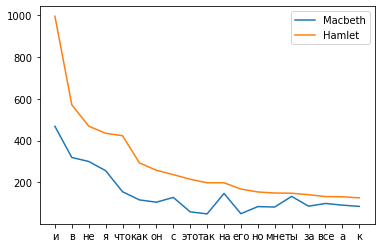

In [23]:
x1 = intersectDF['Word']
y1 = intersectDF['Macbeth']
# plotting the line 1 points 
plt.plot(x1, y1, label = "Macbeth")
# line 2 points
x2 = intersectDF['Word']
y2 = intersectDF['Hamlet']
# plotting the line 2 points 
plt.plot(x2, y2, label = "Hamlet")
plt.legend()
plt.show()

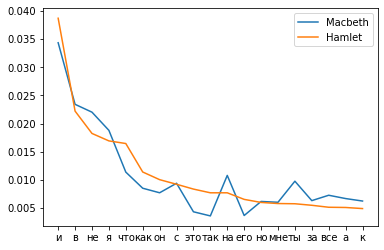

In [24]:
intersectDF['Macbeth'] = intersectDF['Macbeth']/len(macbeth_words)
intersectDF['Hamlet'] = intersectDF['Hamlet']/len(hamlet_words)
x1 = intersectDF['Word']
y1 = intersectDF['Macbeth']
# plotting the line 1 points 
plt.plot(x1, y1, label = "Macbeth")
# line 2 points
x2 = intersectDF['Word']
y2 = intersectDF['Hamlet']
# plotting the line 2 points 
plt.plot(x2, y2, label = "Hamlet")
plt.legend()
plt.show()

In [25]:
len(macbeth_words)

13623

### Пропорции для "и"

In [26]:
data = [['hamlet', len(hamlet_words), 995], ['macbeth', len(macbeth_words), 468]] 

In [27]:
df = pd.DataFrame(data, columns = ['Name', 'nobs', 'и']) 

In [28]:
df

,Name,nobs,и
0,hamlet,25707,995
1,macbeth,13623,468


In [29]:
z1, p_value1 = sm.stats.proportions_ztest(df['и'], df['nobs'])

In [30]:
#  z-метка и p-значение
print(['{:.12f}'.format(b) for b in (z1, p_value1)])

['2.169875493599', '0.030016279294']


### Пропорции для "в"

In [31]:
data = [['hamlet', len(hamlet_words), 571], ['macbeth', len(macbeth_words), 319]] 
df = pd.DataFrame(data, columns = ['Name', 'nobs', 'в']) 
df

,Name,nobs,в
0,hamlet,25707,571
1,macbeth,13623,319


In [32]:
z, p_value = sm.stats.proportions_ztest(df['в'], nobs = df['nobs'])
#  z-метка и p-значение
print(['{:.12f}'.format(b) for b in (z, p_value)])

['-0.764222427499', '0.444734703608']


### Пропорции для "я"

In [33]:
data = [['hamlet', len(hamlet_words), 435], ['macbeth', len(macbeth_words), 256]] 
df = pd.DataFrame(data, columns = ['Name', 'nobs', 'я']) 
df

,Name,nobs,я
0,hamlet,25707,435
1,macbeth,13623,256


In [34]:
z, p_value = sm.stats.proportions_ztest(df['я'], df['nobs'])
#  z-метка и p-значение
print(['{:.12f}'.format(b) for b in (z, p_value)])

['-1.343323504256', '0.179167244520']


### Пропорции для "не"

In [35]:
data = [['hamlet', len(hamlet_words), 469], ['macbeth', len(macbeth_words), 300]] 
df = pd.DataFrame(data, columns = ['Name', 'nobs', 'не']) 
df

,Name,nobs,не
0,hamlet,25707,469
1,macbeth,13623,300


In [36]:
z, p_value = sm.stats.proportions_ztest(df['не'], df['nobs'])
#  z-метка и p-значение
print(['{:.12f}'.format(b) for b in (z, p_value)])

['-2.574505751962', '0.010038341741']
